# Model Bias
This repository checks for model biasnes of the model `eos6oli : Aqueous Solubility Prediction` provided by [Ersilia Model Hub](https://ersilia.gitbook.io/ersilia-book/ersilia-model-hub/installation)



# Data Processing

In this notebook, I am loading a dataset of molecules and their log solubilities I obtained [here](https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv) from John S. Delaney's research on [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x) and processing them to make sure I have:

- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [ ]:
%pip install rdkit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append('../src')
from smiles_processing import standardise_smiles
from inchikey_processing import standardise_inchikey

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

sol_data = '../data/delaney.csv'
data_folder = '../data'
sampled_data = '../data/sample_data.csv'
input = '../data/input.csv'
output = '../data/output.csv'




Note: you may need to restart the kernel to use updated packages.


In [ ]:
#load data from /data folder
data = pd.read_csv(sol_data)

In [ ]:
# rename the measured log solubility column
data.rename(columns={'measured log(solubility:mol/L)': 'measured_log_solubility', 'ESOL predicted log(solubility:mol/L)': 'ESOL_log'}, inplace=True)
data

,Compound ID,measured_log_solubility,ESOL_log,SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


## Standardise the SMILES and InChiKey representation of the compounds

In [ ]:
# standardise SMILES 
smiles_list = data['SMILES'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
data['standard_smiles'] = standardised_smiles_list
data

,Compound ID,measured_log_solubility,ESOL_log,SMILES,standard_smiles
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),CNC(=O)C(C)SCCSP(=O)(OC)OC
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


In [ ]:
# check for null values in standardised SMILES

data = data.dropna()
data.isnull().sum()

Compound ID                0
measured_log_solubility    0
ESOL_log                   0
SMILES                     0
standard_smiles            0
dtype: int64

In [ ]:
# get standardised InchiKey from SMILES
smiles_list = data['standard_smiles'].tolist()
standardised_inchikeys_list = standardise_inchikey(smiles_list)
data['standard_inchikeys'] = standardised_inchikeys_list
data

,Compound ID,measured_log_solubility,ESOL_log,SMILES,standard_smiles,standard_inchikeys
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,ClCC(Cl)(Cl)Cl,QVLAWKAXOMEXPM-UHFFFAOYSA-N
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,CC(Cl)(Cl)Cl,UOCLXMDMGBRAIB-UHFFFAOYSA-N
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,ClC(Cl)C(Cl)Cl,QPFMBZIOSGYJDE-UHFFFAOYSA-N
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,ClCC(Cl)Cl,UBOXGVDOUJQMTN-UHFFFAOYSA-N
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,FC(F)(Cl)C(F)(Cl)Cl,AJDIZQLSFPQPEY-UHFFFAOYSA-N
...,...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),CNC(=O)C(C)SCCSP(=O)(OC)OC,LESVOLZBIFDZGS-UHFFFAOYSA-N
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O,FSCWZHGZWWDELK-UHFFFAOYSA-N
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-UHFFFAOYSA-N
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O,MTZBBNMLMNBNJL-UHFFFAOYSA-N


## Create the 1000 Samples dataset


In [ ]:
# commented out for reproducability of the results
# data = data.sample(n=1000)
# data.to_csv(os.path.join(data_folder, 'sample_data.csv'), index=False)

In [ ]:
# check for null values and keep the desired columns and only 1000 samples
print(f'Null values: {data.standard_inchikeys.isna().sum()}')

sampled_df = pd.read_csv(sampled_data)


input_df = sampled_df[['standard_inchikeys', 'standard_smiles']]
input_df.to_csv(os.path.join(data_folder, 'bias_input.csv'), index=False)


Null values: 0


## Run model predictions

- First, run `ersilia -v fetch eos6oli` on the terminal to fetch the model.

- Run `ersilia serve eos6oli` to serve the model.

- Run `ersilia -v api run -i data/bias_input.csv -o data/bias_output.csv` to make predictions and save the output in the output.csv

# Model Bias Evaluation
Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

## Explore the output data

In [ ]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

output_df = pd.read_csv(output)
output_df

,key,input,solubility
0,HLVFKOKELQSXIQ-UHFFFAOYSA-N,CC(C)CBr,-1.668
1,HNRMPXKDFBEGFZ-UHFFFAOYSA-N,CCC(C)(C)C,-2.752
2,SPANOECCGNXGNR-UHFFFAOYSA-N,CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C,-3.474
3,LAOZSCRCYVBSJA-UHFFFAOYSA-N,CC1(C)C(=O)NC(=O)NC1=O,-0.703
4,YNQLUTRBYVCPMQ-UHFFFAOYSA-N,CCc1ccccc1,-2.326
...,...,...,...
995,GVEPBJHOBDJJJI-UHFFFAOYSA-N,c1ccc2c(c1)-c1cccc3cccc-2c13,-5.797
996,FYZBOYWSHKHDMT-UHFFFAOYSA-N,CCOC(=O)CCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(C)C,-4.152
997,PXWUKZGIHQRDHL-UHFFFAOYSA-N,CCNc1nc(NC(C)C)nc(OC)n1,-2.212
998,QNVRIHYSUZMSGM-UHFFFAOYSA-N,CCCCC(C)O,-0.300


In [ ]:
# check for any null values in the solubility column
output_df['solubility'].isnull().sum()

0

In [ ]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         1000 non-null   object 
 1   input       1000 non-null   object 
 2   solubility  1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
#merge the input csv to the output for visualization

predicted_solubility = output_df[['solubility']]
merged_df = pd.concat([sampled_df, predicted_solubility], axis=1)


merged_df


,Compound ID,measured_log_solubility,ESOL_log,SMILES,standard_smiles,standard_inchikeys,solubility
0,1-Bromo-2-methylpropane,-2.430,-2.288,CC(C)CBr,CC(C)CBr,HLVFKOKELQSXIQ-UHFFFAOYSA-N,-1.668
1,"2,2-Dimethylbutane",-3.550,-2.584,CCC(C)(C)C,CCC(C)(C)C,HNRMPXKDFBEGFZ-UHFFFAOYSA-N,-2.752
2,Diallate,-4.286,-3.827,CC(C)N(C(C)C)C(=O)SCC(=CCl)Cl,CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C,SPANOECCGNXGNR-UHFFFAOYSA-N,-3.474
3,"5,5-Dimethylbarbituric acid",-1.742,-0.556,O=C1NC(=O)NC(=O)C1(C)C,CC1(C)C(=O)NC(=O)NC1=O,LAOZSCRCYVBSJA-UHFFFAOYSA-N,-0.703
4,Ethylbenzene,-2.770,-2.988,CCc1ccccc1,CCc1ccccc1,YNQLUTRBYVCPMQ-UHFFFAOYSA-N,-2.326
...,...,...,...,...,...,...,...
995,Fluoranthene,-6.000,-4.957,c1ccc2c(c1)c3cccc4cccc2c34,c1ccc2c(c1)-c1cccc3cccc-2c13,GVEPBJHOBDJJJI-UHFFFAOYSA-N,-5.797
996,Benfuracarb,-4.710,-5.133,CCOC(=O)CCN(SN(C)C(=O)Oc1cccc2CC(C)(C)Oc21)C(C)C,CCOC(=O)CCN(SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2)C(C)C,FYZBOYWSHKHDMT-UHFFFAOYSA-N,-4.152
997,Atratone,-2.084,-3.185,CCNc1nc(NC(C)C)nc(OC)n1,CCNc1nc(NC(C)C)nc(OC)n1,PXWUKZGIHQRDHL-UHFFFAOYSA-N,-2.212
998,2-Hexanol,-0.890,-1.324,CCCCC(C)O,CCCCC(C)O,QNVRIHYSUZMSGM-UHFFFAOYSA-N,-0.300


## Visualizations


### a) Distribution of the Predicted Log Solubility of the Molecules

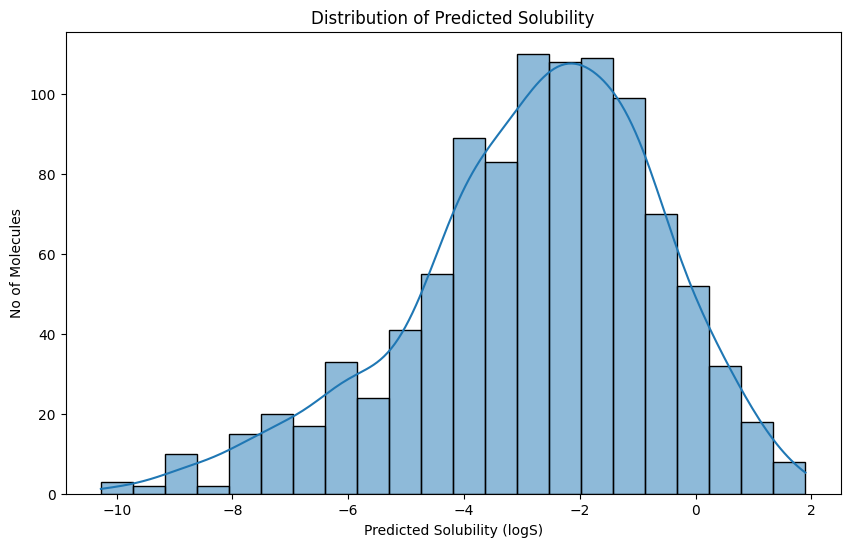

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6));
sns.histplot(merged_df['solubility'],kde=True);

# Set plot labels and title
plt.xlabel('Predicted Solubility (logS)');
plt.ylabel('No of Molecules');
plt.title('Distribution of Predicted Solubility');

# save figure
os.makedirs("../figures", exist_ok=True)
plt.savefig('../figures/Distribution of Predicted Solubility.png')

- From the histogram,we can conclude that most molecules have an aqueous solubility of -2.0

### b) Measured Solubility Vs Predicted Solubility

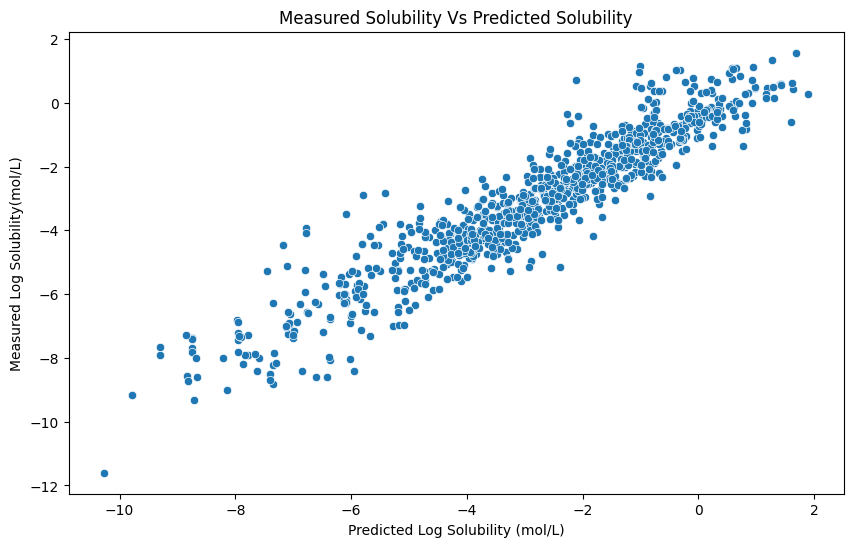

In [ ]:
# Create a scatterplot
plt.figure(figsize=(10, 6));
sns.scatterplot(data = merged_df, x = 'solubility', y = 'measured_log_solubility');

# Set plot labels and title
plt.xlabel('Predicted Log Solubility (mol/L)');
plt.ylabel('Measured Log Solubility(mol/L)');
plt.title('Measured Solubility Vs Predicted Solubility');

# save figure
plt.savefig('../figures/Measured Solubility Vs Predicted Solubility.png')

- There is a linear relationship between the measured log solubility(logS) and the predicted log solubility of the molecules.
- The linear relationship is stronger for molecules with logS value between -4.0 and 0.

### c) Comparision between Predicted, Measured and Estimated logS Distribution

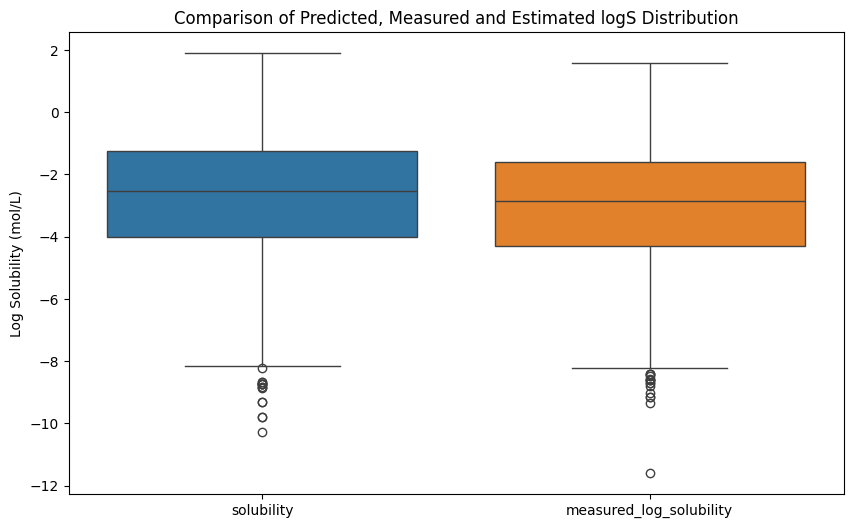

In [ ]:
# Plot the first histogram
plt.figure(figsize=(10, 6));

sns.boxplot(data=[merged_df['solubility'], merged_df['measured_log_solubility']]);

# Add labels and title
plt.ylabel('Log Solubility (mol/L)');
plt.title('Comparison of Predicted, Measured and Estimated logS Distribution');

# save figure
plt.savefig('../figures/Predicted, Measured and Estimated logS Distribution.png')


- The median value of the predicted solubility values is slightly higher than the measured solubility of the molecules.

## Conclusion
- The model proves to provide consistent predictions of Aqueous Solubility of molecules as compared to the measured values especially for molecules that have a log solubility of -4.0 to 0.
- The model doesn't perform well on outliers as observed in the box plot comparing the measured and predicted solubilities.